In [1]:
!pip install -q -r requirements.txt

# Advanced Boosting Method: CatBoost


### 1. import Libraries


In [19]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Import Dataset

In [20]:
df = pd.read_csv('../data/processed/TelcoCustomerChurnPredictionFeatureScaled.csv')

In [21]:
X = X = df.drop(columns=["Churn"])
Y = df["Churn"].map({"Yes" : 1, "No": 0})

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

In [23]:
cat_clf = CatBoostClassifier(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    eval_metric='Accuracy',
    random_seed=42,
    verbose=False
)

cat_clf.fit(X_train, y_train)

y_pred = cat_clf.predict(X_test)

Accuracy: 0.7984386089425124
Precision: 0.6461038961038961
Recall: 0.5320855614973262
F1 Score: 0.5835777126099707

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.87      1035
           1       0.65      0.53      0.58       374

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.73      1409
weighted avg       0.79      0.80      0.79      1409


Confusion Matrix:
 [[926 109]
 [175 199]]


Text(50.722222222222214, 0.5, 'Actual')

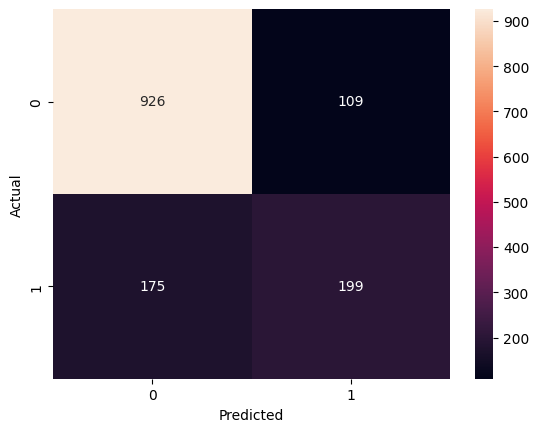

In [24]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")

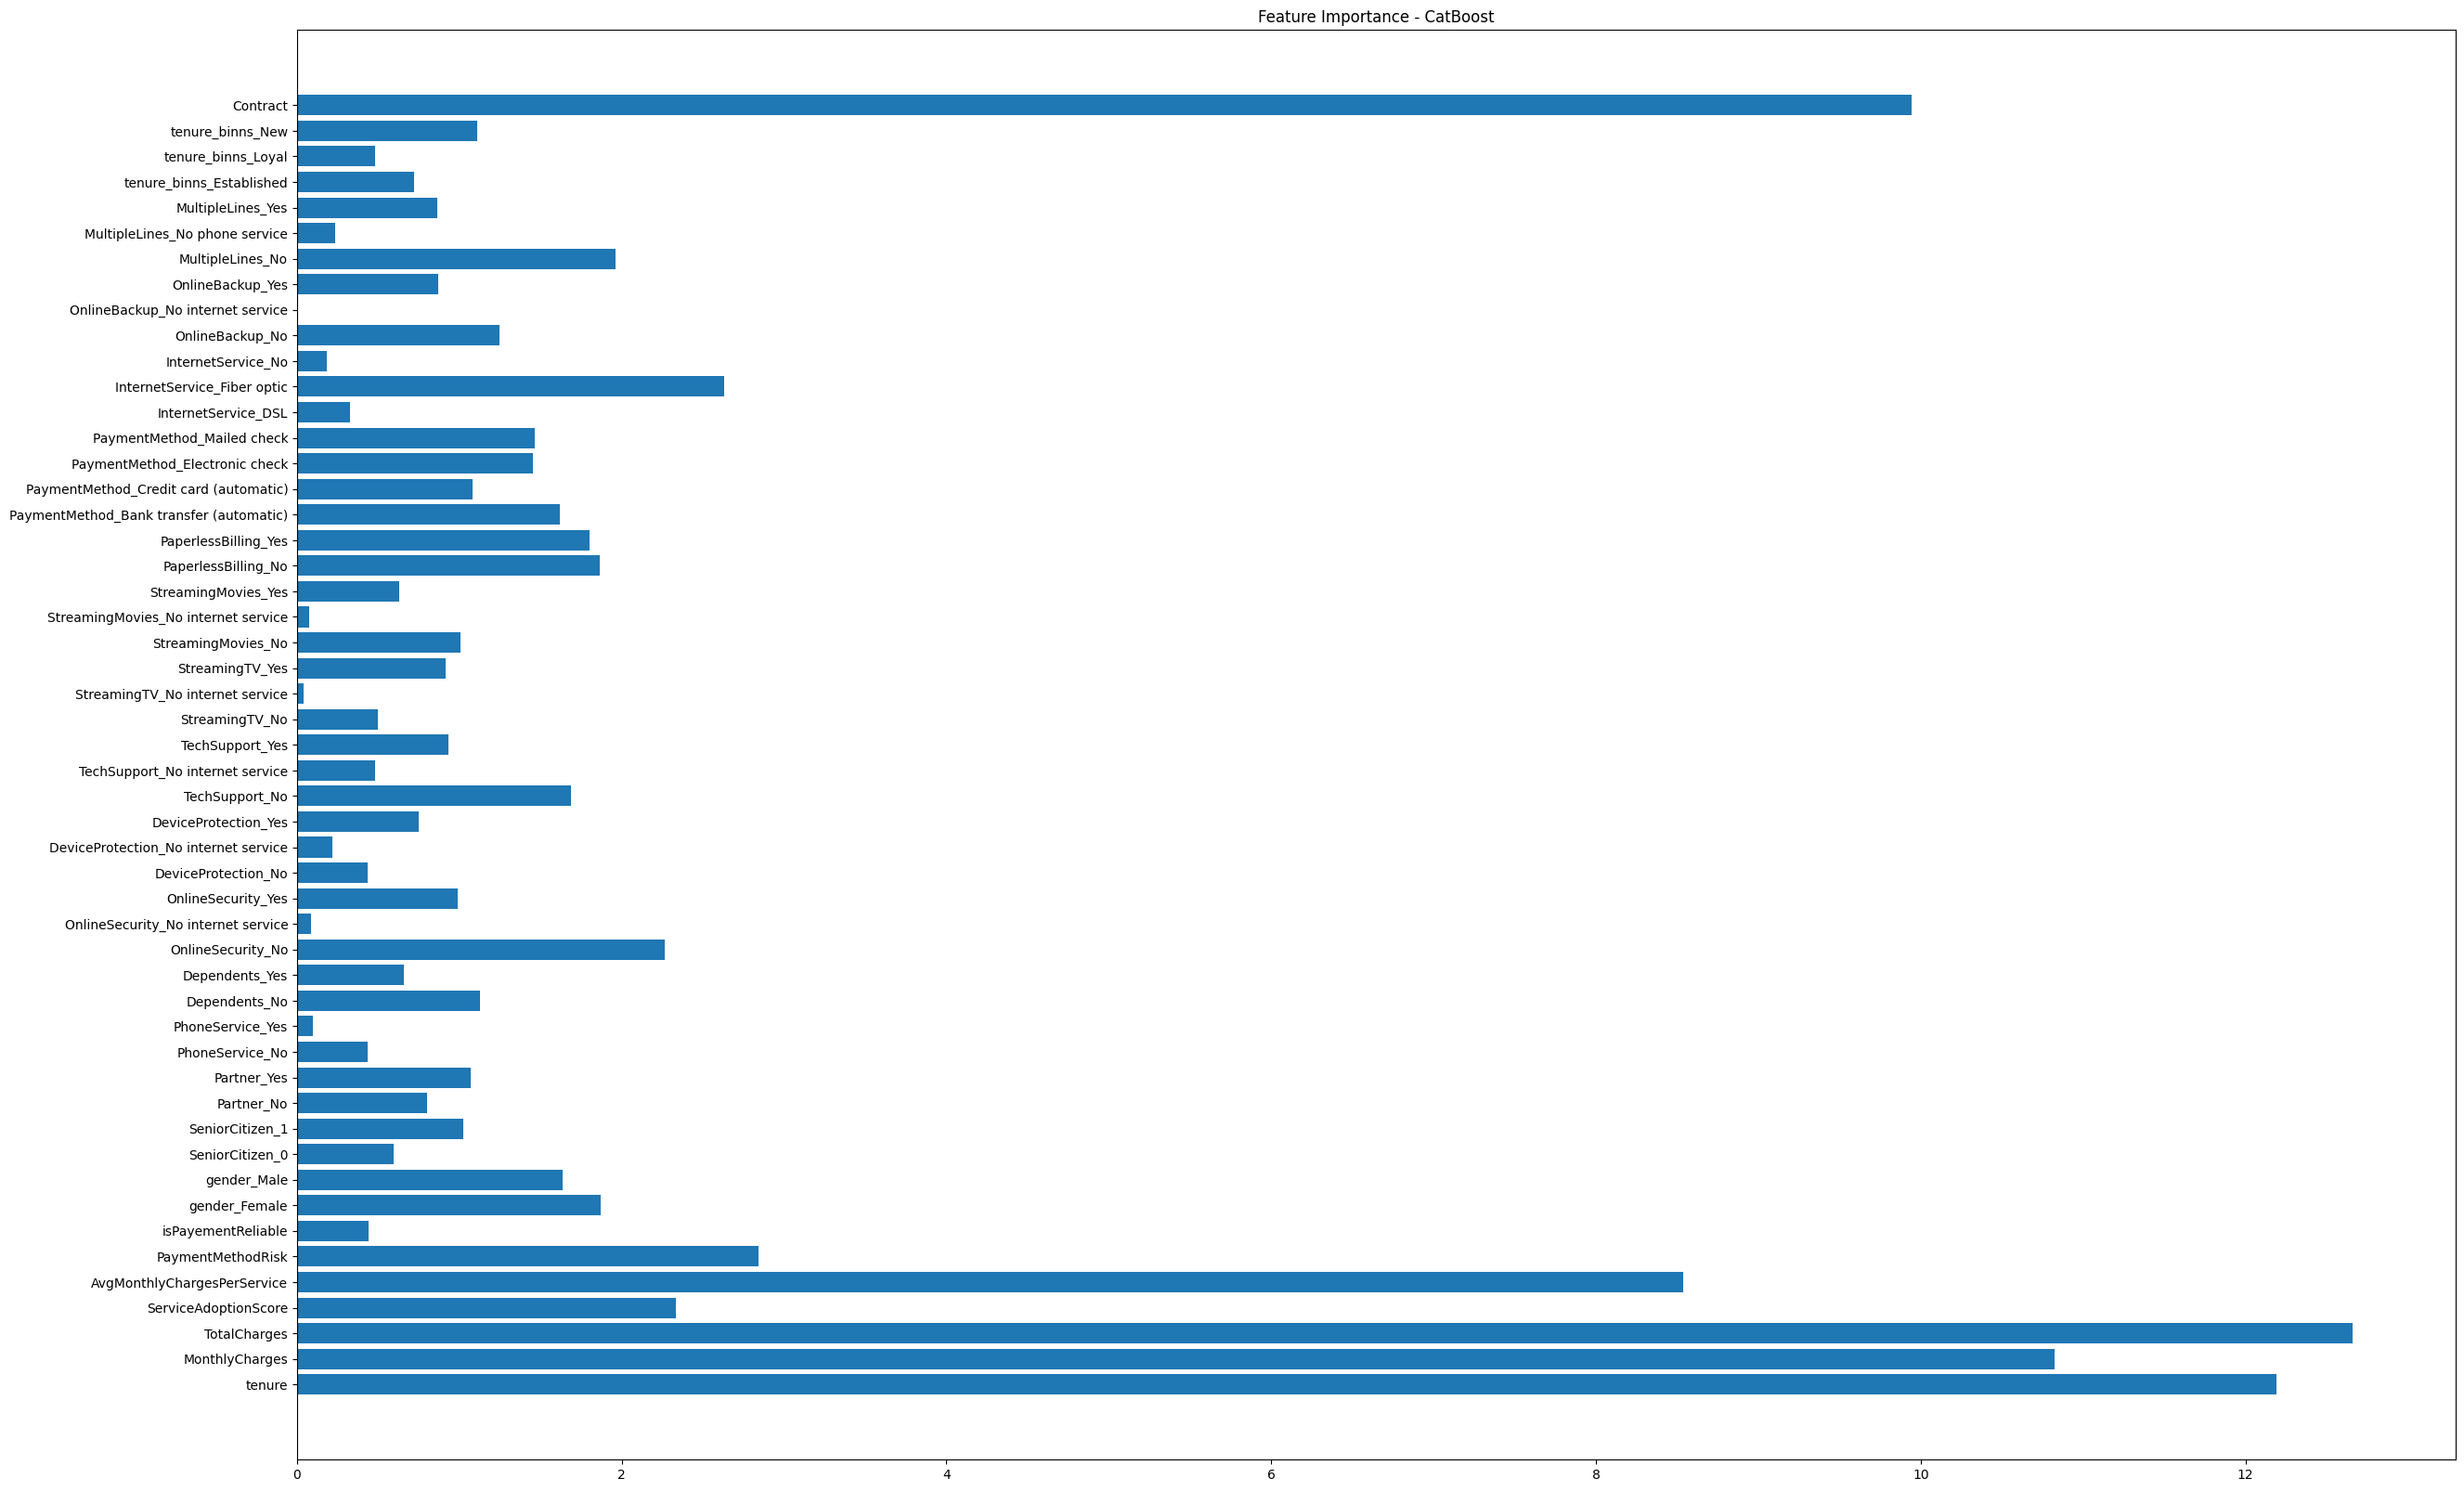

In [26]:
feature_importances = cat_clf.get_feature_importance()
features = X.columns

plt.figure(figsize=(30,20))
plt.barh(features, feature_importances)
plt.title("Feature Importance - CatBoost")
plt.show()

### Hyperparamter Tuninig

In [ ]:
# Initialize CatBoost classifier
cat_clf = CatBoostClassifier(
    random_seed=42,
    verbose=0,
    eval_metric='Accuracy'
)

# Define hyperparameter grid
param_grid = {
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'iterations': [200, 500, 1000],
    'l2_leaf_reg': [1, 3, 5],
    'subsample': [0.7, 0.8, 1.0]
}

# GridSearchCV
grid_search = GridSearchCV(
    estimator=cat_clf,
    param_grid=param_grid,
    cv=3,
    scoring='f1',
    verbose=False,
    n_jobs=-1
)

# Fit
grid_search.fit(X, Y)

# Best parameters & score
print("Best Parameters:", grid_search.best_params_)
print("Best F1:", grid_search.best_score_)

Fitting 3 folds for each of 243 candidates, totalling 729 fits
[CV] END depth=4, iterations=200, l2_leaf_reg=1, learning_rate=0.01, subsample=0.7; total time=   0.4s
[CV] END depth=4, iterations=200, l2_leaf_reg=1, learning_rate=0.01, subsample=0.8; total time=   0.4s
[CV] END depth=4, iterations=200, l2_leaf_reg=1, learning_rate=0.01, subsample=1.0; total time=   0.4s
[CV] END depth=4, iterations=200, l2_leaf_reg=1, learning_rate=0.01, subsample=0.7; total time=   0.5s
[CV] END depth=4, iterations=200, l2_leaf_reg=1, learning_rate=0.01, subsample=0.8; total time=   0.5s
[CV] END depth=4, iterations=200, l2_leaf_reg=1, learning_rate=0.01, subsample=0.8; total time=   0.5s
[CV] END depth=4, iterations=200, l2_leaf_reg=1, learning_rate=0.05, subsample=0.7; total time=   0.5s
[CV] END depth=4, iterations=200, l2_leaf_reg=1, learning_rate=0.01, subsample=0.7; total time=   0.5s
[CV] END depth=4, iterations=200, l2_leaf_reg=1, learning_rate=0.01, subsample=1.0; total time=   0.5s
[CV] END d

Accuracy: 0.8232789212207239
Precision: 0.7133105802047781
Recall: 0.5588235294117647
F1 Score: 0.6266866566716641

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.92      0.88      1035
           1       0.71      0.56      0.63       374

    accuracy                           0.82      1409
   macro avg       0.78      0.74      0.76      1409
weighted avg       0.82      0.82      0.82      1409


Confusion Matrix:
 [[951  84]
 [165 209]]


Text(50.722222222222214, 0.5, 'Actual')

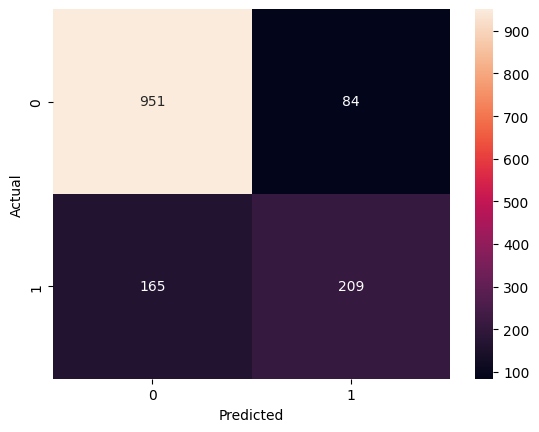

In [28]:
best_cat = grid_search.best_estimator_
y_pred_best = best_cat.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Precision:", precision_score(y_test, y_pred_best))
print("Recall:", recall_score(y_test, y_pred_best))
print("F1 Score:", f1_score(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")